<a href="https://colab.research.google.com/github/mediumhust/ml/blob/master/assets/kmeans/Kmeans2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MNIST

Download:


In [11]:
!pip install pandas python-mnist numpy scikit-learn matplotlib -q

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
%cd /content/drive/My Drive/Colab Notebooks/ml

/content/drive/My Drive/Colab Notebooks/ml


In [12]:
# %reset
import numpy as np
from mnist import MNIST
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import normalize

[display_network.py](https://github.com/tiepvupsu/tiepvupsu.github.io/blob/master/assets/kmeans/display_network.py)

In [15]:
!echo $PWD

/content/drive/MyDrive/Colab Notebooks/ml


In [22]:
import sys

sys.path.insert(0, '/content/drive/MyDrive/Colab Notebooks/ml/kmeans')

In [24]:
from display_network import *

mndata = MNIST('./MNIST/')
mndata.load_testing()
X = mndata.test_images
X0 = np.asarray(X)[:1000,:]/256.0
X = X0

K = 10
kmeans = KMeans(n_clusters=K).fit(X)

pred_label = kmeans.predict(X)

In [31]:
print(pred_label)

[2 0 1 7 6 1 4 4 6 2 7 8 4 7 1 5 6 2 5 4 2 0 8 0 4 7 4 6 7 1 5 1 5 8 2 9 2
 1 0 1 1 2 4 1 0 0 4 9 6 6 0 5 0 5 8 3 6 1 6 1 4 2 4 9 2 4 8 6 5 7 2 7 9 2
 1 2 5 2 2 2 4 8 9 4 3 6 2 5 8 1 5 0 2 5 1 6 1 2 8 6 8 7 3 6 6 6 9 1 4 2 0
 1 0 4 2 2 4 6 2 2 5 2 4 8 2 4 7 3 3 3 8 0 5 2 3 1 7 1 8 2 0 4 5 1 2 1 3 9
 7 1 6 6 2 5 1 3 8 7 5 1 4 8 3 6 8 5 4 1 1 4 4 2 9 5 9 1 1 3 1 3 1 3 0 7 0
 4 9 5 7 1 1 1 7 4 7 1 1 0 4 9 5 8 1 1 1 5 4 5 9 4 6 2 6 1 4 7 5 0 2 0 4 9
 8 2 1 9 3 4 1 2 0 1 3 2 2 4 9 9 6 1 5 5 2 4 1 0 7 0 6 9 4 1 4 0 4 4 9 0 9
 8 3 1 4 2 4 1 3 1 5 7 5 7 1 2 6 6 1 3 9 1 9 2 2 2 6 9 0 6 1 5 6 9 4 9 7 6
 7 7 9 3 1 4 1 2 2 7 9 2 2 0 5 7 7 5 1 6 0 1 7 5 1 2 4 0 5 2 0 7 2 1 1 9 1
 3 5 5 6 4 5 8 0 4 1 5 3 1 0 3 1 4 1 3 7 8 9 0 3 1 4 4 6 8 2 1 3 0 8 5 0 5
 4 0 7 3 3 3 4 1 1 6 7 4 5 2 8 1 0 9 1 4 8 3 0 1 2 5 9 5 6 6 9 3 5 2 9 6 5
 7 5 1 4 2 5 4 4 4 1 4 9 1 2 9 4 9 7 6 2 1 2 3 1 9 4 4 4 2 2 5 2 0 7 7 5 0
 9 8 8 2 3 5 5 3 9 5 6 1 1 0 3 7 4 8 8 8 2 3 2 9 2 3 3 4 8 1 3 6 1 9 0 5 1
 4 4 1 4 7 2 6 2 1 8 0 9 

<class 'numpy.ndarray'>
(784, 10)


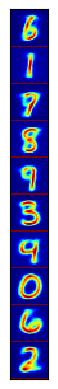

In [28]:
print(type(kmeans.cluster_centers_.T))
print(kmeans.cluster_centers_.T.shape)
A = display_network(kmeans.cluster_centers_.T, K, 1)

f1 = plt.imshow(A, interpolation='nearest', cmap = "jet")
f1.axes.get_xaxis().set_visible(False)
f1.axes.get_yaxis().set_visible(False)
plt.show()
# plt.savefig('a1.png', bbox_inches='tight')


# a colormap and a normalization instance
cmap = plt.cm.jet
norm = plt.Normalize(vmin=A.min(), vmax=A.max())

# map the normalized data to colors
# image is now RGBA (512x512x4)
image = cmap(norm(A))

import scipy.misc
# scipy.misc.imsave('aa.png', image)

Chọn một vài ảnh từ mỗi cluster.

In [32]:
print(type(pred_label))
print(pred_label.shape)
print(type(X0))

<class 'numpy.ndarray'>
(1000,)
<class 'numpy.ndarray'>


In [36]:

N0 = 20;
X1 = np.zeros((N0*K, 784))
X2 = np.zeros((N0*K, 784))

for k in range(K):
    Xk = X0[pred_label == k, :]

    center_k = [kmeans.cluster_centers_[k]]
    neigh = NearestNeighbors(n_neighbors=N0).fit(Xk)
    dist, nearest_id  = neigh.kneighbors(center_k, N0)

    X1[N0*k: N0*k + N0,:] = Xk[nearest_id, :]
    X2[N0*k: N0*k + N0,:] = Xk[:N0, :]

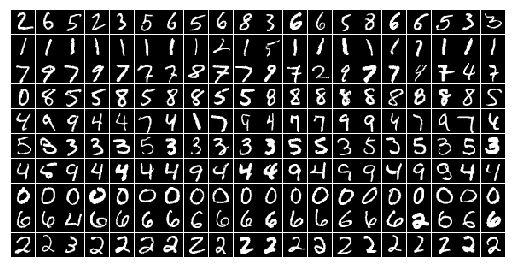

In [37]:
plt.axis('off')
A = display_network(X2.T, K, N0)
f2 = plt.imshow(A, interpolation='nearest' )
plt.gray()
plt.show()

# import scipy.misc
# scipy.misc.imsave('bb.png', A)


# plt.axis('off')
# A = display_network(X1.T, 10, N0)
# scipy.misc.imsave('cc.png', A)
# f2 = plt.imshow(A, interpolation='nearest' )
# plt.gray()

# plt.show()

<ipython-input-42-ad0f591fc7f7>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iv['cluster']=kmeans.fit_predict(iv)


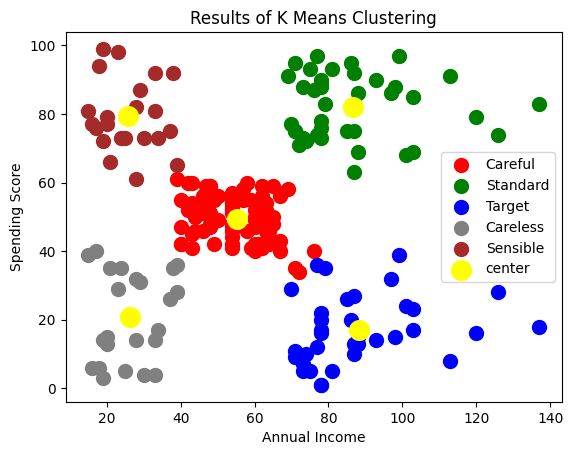

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

mydata = pd.read_csv("./kmeans/Mall_Customers.csv")

iv = mydata[['Annual Income (k$)','Spending Score (1-100)']]

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5 , n_init =10 , random_state =0 )
kmeans.fit_predict(iv)

iv['cluster']=kmeans.fit_predict(iv)

# iv.head()

# Cluster Plot
plt.scatter(iv.loc[iv['cluster']==0,'Annual Income (k$)'],iv.loc[iv['cluster']==0,'Spending Score (1-100)'],s=100,c='red',label='Careful')
plt.scatter(iv.loc[iv['cluster']==1,'Annual Income (k$)'],iv.loc[iv['cluster']==1,'Spending Score (1-100)'],s=100,c='green',label='Standard')
plt.scatter(iv.loc[iv['cluster']==2,'Annual Income (k$)'],iv.loc[iv['cluster']==2,'Spending Score (1-100)'],s=100,c='blue',label='Target')
plt.scatter(iv.loc[iv['cluster']==3,'Annual Income (k$)'],iv.loc[iv['cluster']==3,'Spending Score (1-100)'],s=100,c='grey',label='Careless')
plt.scatter(iv.loc[iv['cluster']==4,'Annual Income (k$)'],iv.loc[iv['cluster']==4,'Spending Score (1-100)'],s=100,c='brown',label='Sensible')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=200,c='yellow',label='center')

plt.title("Results of K Means Clustering")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()

1 270365.5
2 181719.70909090902
3 106718.02731970641
4 73965.40167106727
5 44448.45544793369
6 37265.86520484345
7 30270.371492999737
8 25056.323972218066
9 21833.16522568949
10 20070.333521833123


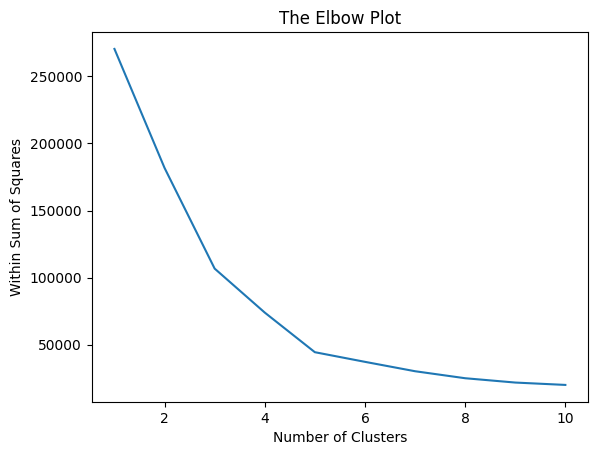

In [43]:
## Code to find within sum of squares
wss= []
for i in range(1,11) :
    kmeans = KMeans(n_clusters = i, n_init =10 ,random_state =0 )
    kmeans.fit(iv)
    wss.append(kmeans.inertia_)  #Inertia: Sum of distances of samples to their closest cluster center
    print (i, kmeans.inertia_)

#find the values where change slowing down .


## Plotting the Within Sum of Squares
plt.plot(range(1,11),wss)
plt.title("The Elbow Plot")
plt.xlabel("Number of Clusters")
plt.ylabel("Within Sum of Squares")
plt.show()

Segmentation and Compression

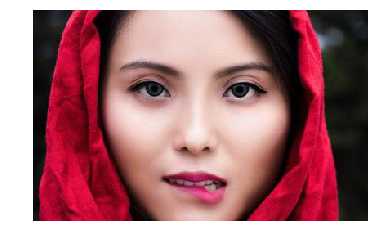

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

img = mpimg.imread('girl3.jpg')
plt.imshow(img)
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
X = img.reshape((img.shape[0]*img.shape[1], img.shape[2]))

Số lượng cluster khác nhau.


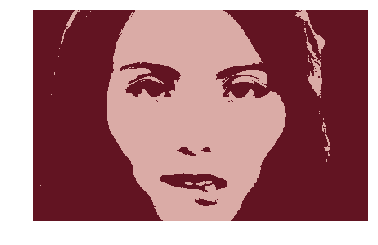

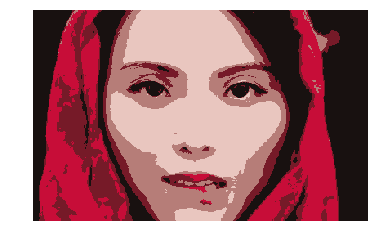

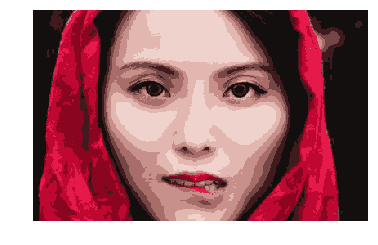

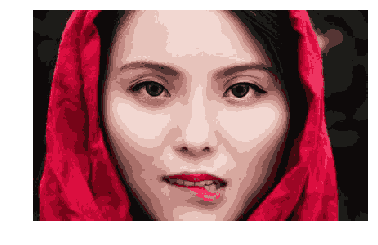

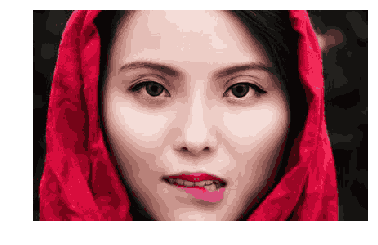

In [ ]:
for K in [2, 5, 10, 15, 20]:
    kmeans = KMeans(n_clusters=K).fit(X)
    label = kmeans.predict(X)

    img4 = np.zeros_like(X)
    # replace each pixel by its center
    for k in range(K):
        img4[label == k] = kmeans.cluster_centers_[k]
    # reshape and display output image
    img5 = img4.reshape((img.shape[0], img.shape[1], img.shape[2]))
    plt.imshow(img5, interpolation='nearest')
    plt.axis('off')
    plt.show()

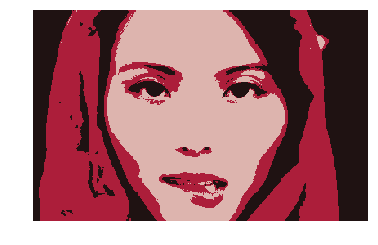

In [ ]:
for K in [3]:
    kmeans = KMeans(n_clusters=K).fit(X)
    label = kmeans.predict(X)

    img4 = np.zeros_like(X)
    # replace each pixel by its center
    for k in range(K):
        img4[label == k] = kmeans.cluster_centers_[k]
    # reshape and display output image
    img5 = img4.reshape((img.shape[0], img.shape[1], img.shape[2]))
    plt.imshow(img5, interpolation='nearest')
    plt.axis('off')
    plt.show()